In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [22]:
# define secret number here
secretnumber = '10101011101'

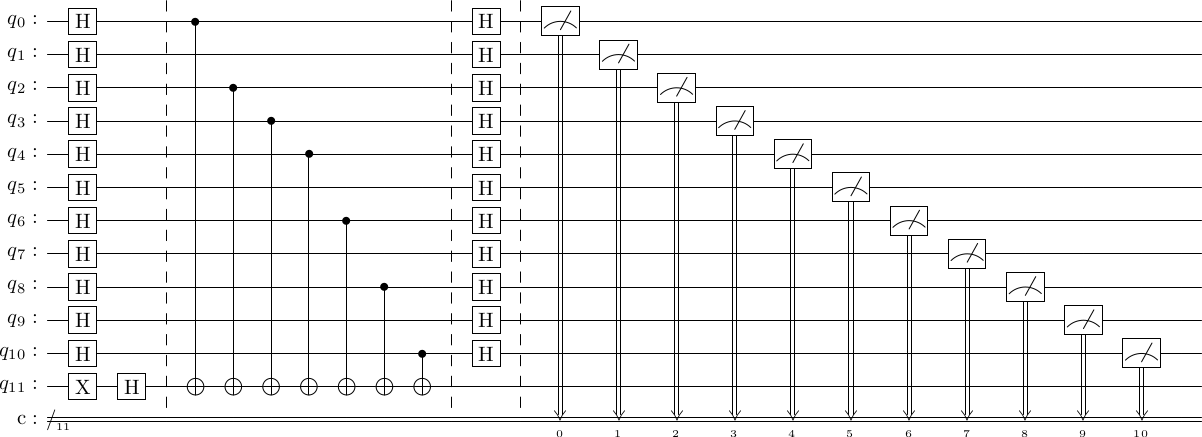

In [23]:
# define circuit builder
def bernstein_vazirani(string):
    
    # Save the length of string
    N = len(string)
    
    # Make a quantum circuit
    circuit = QuantumCircuit(N+1, N)
    
    # Step 1: set q_(len(string)) to |->
    circuit.x(N)
    circuit.h(N)
    
    # Step 2: apply hadamard gates to q_0 thru q_(len(string)-1) 
    circuit.h(range(N))
    
    circuit.barrier()
    
    # Step 3: Query the Oracle

    s = string[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(N):
        if s[q] != '0':
            circuit.cx(q, N)
            
    circuit.barrier()
    
    # Apply Hadamard gates after querying the oracle
    
    for i in range(N):
        circuit.h(i)
        
    circuit.barrier()
    
    # Measurement
    circuit.measure(range(N), range(N))
    
    return circuit

qc = bernstein_vazirani(secretnumber)

qc.draw('latex')

In [24]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1).result()
count = result.get_counts()

print(count)

{'10101011101': 1}
